# <div class="alert alert-danger" >  The Chat Format</div>

 
One of the exciting things about a large 
language model is you could use it to 
build a custom chatbot with only a modest amount of effort. 
ChatGPT, the web interface, is a way for you 
to have a conversational interface, a conversation via a large language 
model. But one of the cool things is you can also use a 
large language model to build your custom chatbot 
to maybe play the role of an AI customer service agent or 
an AI order taker for a restaurant. And in this lesson, you'll 
learn how to do that by yourself. 
I'm going to describe the components of 
the OpenAI chat completions format in 
more detail and then you're going to build a chatbot yourself. So let's 
get into it.


`In this notebook, you will explore how you can utilize the chat format to have extended conversations with chatbots personalized or specialized for specific tasks or behaviors.`

### <div class="alert alert-success" > Setup
So first we'll set up the OpenAI Python package as 
usual. 

In [1]:
import os
import openai
from dotenv import load_dotenv, find_dotenv
_ = load_dotenv(find_dotenv()) # read local .env file

openai.api_key  = os.getenv('OPENAI_API_KEY')


So chat models like ChatGPT are actually trained 
to take a series of messages as input 
and return a model generated message as output. 
And so although the chat format is designed to make multi-turn 
conversations like this easy, we've kind of seen through the previous 
lessons that it's also just as useful for single-turn tasks without any 
conversation. 

And so next we're going to define two 
helper functions. So <b>get_completion</b> function is the one that we've been using throughout all the 
lessons. 

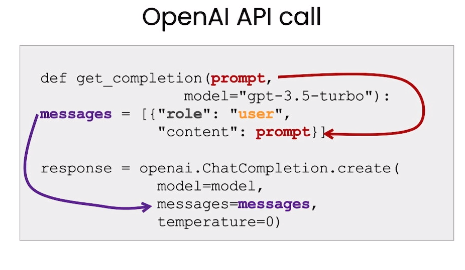

But if you look 
at it, we give a prompt but then inside the 
function what we're actually doing is putting this prompt into what 
looks like some kind of user message. And 
this is because the ChatGPT model is a 
chat model which means it's trained to take 
a series of messages as input and then return a 
model generated message as output. So the user 
message is the input and then the 
assistant message is the output. 

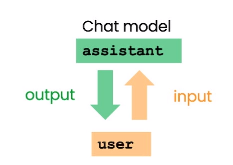

So in this lesson we're going to actually use a different 
helper function and instead of kind of putting a 
single prompt as input and getting a single completion, we're going 
to pass in a list of messages and these messages can be from a variety of different roles. So I'll describe those. 


In [2]:
def get_completion(prompt, model="gpt-3.5-turbo"):
    messages = [{"role": "user", "content": prompt}]
    response = openai.ChatCompletion.create(
        model=model,
        messages=messages,
        temperature=0, # this is the degree of randomness of the model's output
    )
    return response.choices[0].message["content"]

def get_completion_from_messages(messages, model="gpt-3.5-turbo", temperature=0):
    response = openai.ChatCompletion.create(
        model=model,
        messages=messages,
        temperature=temperature, # this is the degree of randomness of the model's output
    )
#     print(str(response.choices[0].message))
    return response.choices[0].message["content"]

<b>Example 1</b>

So here's an example of a list of messages and so the first message is a system message which gives an overall instruction and then after this message we have turns between the user and the assistant and this will continue to go on.


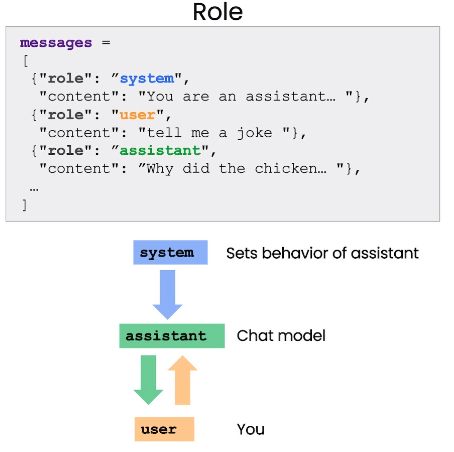

And if you've ever used ChatGPT, the web interface, `then your messages are the user messages and then ChatGPT's 
messages are the assistant messages.` So the system message helps to set the behavior and persona of the assistant and it acts as a high-level instruction for the conversation. So you can think of it as whispering in the assistant's ear and kind of guiding its responses without the user being aware of the system message. So as the user, if you've ever used ChatGPT, you probably don't know what's in ChatGPT's system message. The benefit of the system message is that it provides you, the developer, with a way to frame the conversation without making the request itself part of the conversation. So you can  guide the assistant and whisper in its ear and guide its responses without making the user aware. 




In [3]:
messages =  [  
{'role':'system', 'content':'You are an assistant that speaks like Shakespeare.'},    
{'role':'user', 'content':'tell me a joke'},   
{'role':'assistant', 'content':'Why did the chicken cross the road'},   
{'role':'user', 'content':'I don\'t know'}  ]

In [ ]:
# response = get_completion_from_messages(messages, temperature=1)
# print(response)

So now let's try to use these messages in a conversation. 
So we'll use our new helper function to get the 
completion from the messages. 
And we're also using a higher temperature (temperature=1). 

So the system message says, "You are an assistant 
that speaks like Shakespeare". So this is us kind of describing to 
the assistant how it should behave. And then the first user message is, 
"Tell me a joke". The next is, "Why did the chicken cross the road?" 
And then the final user message is, "I don't know." 
So if we run this, the response is:

<b>Output</b>
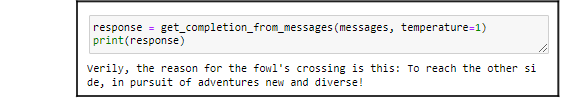

It is an old and classic that never fails. So there's 
our Shakespearean response.

<b>Example 2</b>

So now let's do another example. So here our messages are, the 
system message is "You are a friendly chatbot", and 
the first user message is, "Hi, my name is Isa". And we want to get 
the first user message. So let's execute this for the first 
assistant message. 
And so the first message is, "Hello Isa! It's nice to meet you. How 
can I assist you today?" 

In [4]:
messages =  [  
{'role':'system', 'content':'You are friendly chatbot.'},    
{'role':'user', 'content':'Hi, my name is Isa'}  ]

# response = get_completion_from_messages(messages, temperature=1)
# print(response)

<b>Output</b>

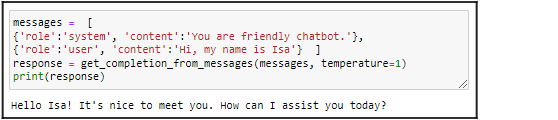

<b>Example 3</b>

Now let's try another example. 
So here our messages are system message, "You are a friendly chatbot" 
and the first user message is, "Yes, can you remind me what is my "name? 
And let's get the response. 
And as you can see, the model doesn't actually know my name. 
So each conversation with a language model is a 
standalone interaction, which means that you must provide 
all relevant messages for the model to draw from in the current 
conversation.

In [6]:
messages =  [  
{'role':'system', 'content':'You are friendly chatbot.'},    
{'role':'user', 'content':'Yes,  can you remind me, What is my name?'}  ]

# response = get_completion_from_messages(messages, temperature=1)
# print(response)

<b> Output</b>

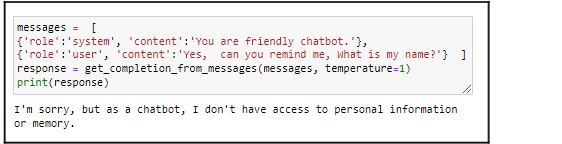

<b>Example 4</b>


If you want the model to draw from, or quote unquote remember 
earlier parts of a conversation, you must provide the 
earlier exchanges in the input to the model. And so we'll 
refer to this as context. So let's try this. 


In [ ]:
messages =  [  
{'role':'system', 'content':'You are friendly chatbot.'},
{'role':'user', 'content':'Hi, my name is Isa'},
{'role':'assistant', 'content': "Hi Isa! It's nice to meet you. \
Is there anything I can help you with today?"},
{'role':'user', 'content':'Yes, you can remind me, What is my name?'}  ]

# response = get_completion_from_messages(messages, temperature=1)
# print(response)

So now we've kind of given the context that the model needs, which 
is my name, in the previous messages, and we'll ask 
the same question, so we'll ask what my name is. 
And the model is able to respond because 
it has all of the context it needs in this kind of 
list of messages that we input to it. 

<b>Output</b>

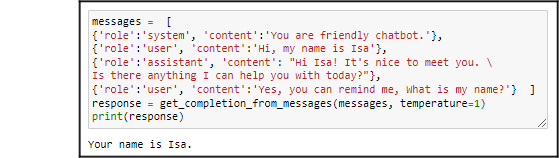


## <div class="alert alert-info" > OrderBot </div>
  
`We can automate the collection of user prompts and assistant responses to build a  OrderBot. The OrderBot will take orders at a pizza restaurant.`    
    
So now you're  going to build your own chatbot. This chatbot is going to be called "OrderBot", and we're going to automate the collection of user prompts and assistant responses in order to build this "OrderBot". And it's going to take orders at a pizza restaurant, so first we're going to define the helper function ( collect_messages ), and what it is doing is that it's going to kind of collect our user messages so we can avoid typing them in by hand in the same way that we did above, and it is going 
to collect prompts from a user interface that we'll build below, and then append it to a list called "context", and then it will call the model with that context every time. And the model response is then also added to the context, so the kind of model 
message is added to the context, the user message is added to the context, so on, so it just kind of grows longer and longer.   
    
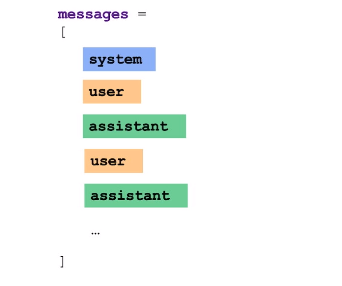    
    
This way the model has the information it needs to determine what to do next. 
       
 

In [7]:
def collect_messages(_):
    prompt = inp.value_input
    inp.value = ''
    context.append({'role':'user', 'content':f"{prompt}"})
    response = get_completion_from_messages(context) 
    context.append({'role':'assistant', 'content':f"{response}"})
    panels.append(
        pn.Row('User:', pn.pane.Markdown(prompt, width=600)))
    panels.append(
        pn.Row('Assistant:', pn.pane.Markdown(response, width=600, style={'background-color': '#F6F6F6'})))
 
    return pn.Column(*panels)


And so now we'll set up and run this kind of UI to display the Autobot. And so here's the context, and it contains the system message that contains the menu. And note that every time we call the language model, we're going to use the same context, and the context is building up over time. 
    

In [9]:
import panel as pn  # GUI
pn.extension()

panels = [] # collect display 

context = [ {'role':'system', 'content':"""
You are OrderBot, an automated service to collect orders for a pizza restaurant. \
You first greet the customer, then collects the order, \
and then asks if it's a pickup or delivery. \
You wait to collect the entire order, then summarize it and check for a final \
time if the customer wants to add anything else. \
If it's a delivery, you ask for an address. \
Finally you collect the payment.\
Make sure to clarify all options, extras and sizes to uniquely \
identify the item from the menu.\
You respond in a short, very conversational friendly style. \
The menu includes \
pepperoni pizza  12.95, 10.00, 7.00 \
cheese pizza   10.95, 9.25, 6.50 \
eggplant pizza   11.95, 9.75, 6.75 \
fries 4.50, 3.50 \
greek salad 7.25 \
Toppings: \
extra cheese 2.00, \
mushrooms 1.50 \
sausage 3.00 \
canadian bacon 3.50 \
AI sauce 1.50 \
peppers 1.00 \
Drinks: \
coke 3.00, 2.00, 1.00 \
sprite 3.00, 2.00, 1.00 \
bottled water 5.00 \
"""} ]  # accumulate messages


# inp = pn.widgets.TextInput(value="Hi", placeholder='Enter text here…')
# button_conversation = pn.widgets.Button(name="Chat!")

# interactive_conversation = pn.bind(collect_messages, button_conversation)

# dashboard = pn.Column(
#     inp,
#     pn.Row(button_conversation),
#     pn.panel(interactive_conversation, loading_indicator=True, height=300),
# )

# dashboard

And then let's execute this.

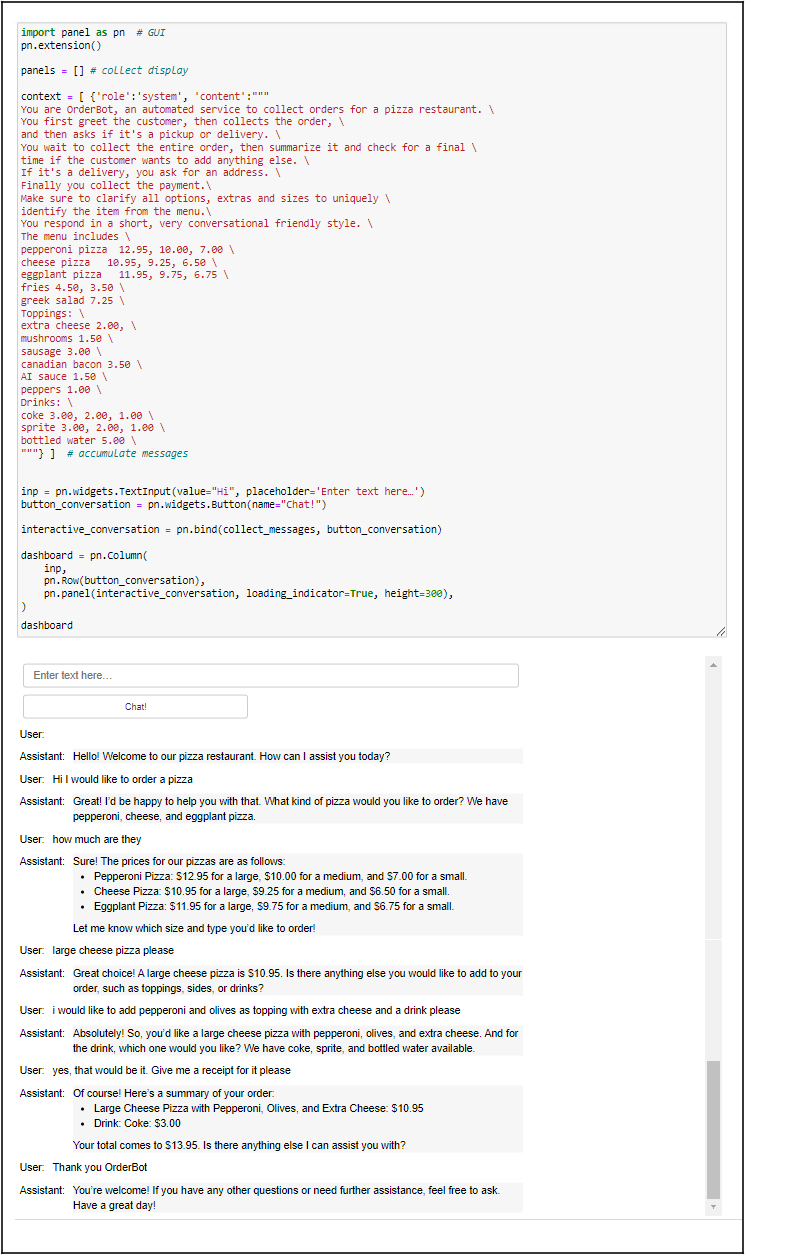


Now we can ask the model to create 
a JSON summary that we could send to 
the order system based on the conversation. So, we're 
now appending another system message, which is an instruction, and we're saying:

`Create a JSON summary of the previous food order. Itemize the price for each item. The fields should be`
`1) pizza, include side `
`2) list of toppings`
`3) list of drinks, include size `
`4) list of sides`
`5) and finally, the total price. `

And you could also use a user message here ('role':'system'). This ('role':'system') does not have to be a system message. 

In [10]:
messages =  context.copy()
messages.append(
{'role':'system', 'content':'create a json summary of the previous food order. Itemize the price for each item\
 The fields should be 1) pizza, include size 2) list of toppings 3) list of drinks, include size   4) list of sides include size  5)total price '},    
)
 #The fields should be 1) pizza, price 2) list of toppings 3) list of drinks, include size include price  4) list of sides include size include price, 5)total price '},    

# response = get_completion_from_messages(messages, temperature=0)
# print(response)

And notice, in this case, we're using a lower 
temperature because for these kinds of tasks, we 
want the output to be fairly predictable. For 
a conversational agent, you might want to use 
a higher temperature. However, in this case, I would maybe use a 
lower temperature as well because for a customer's assistant 
chatbot, you might want the output to be a bit more 
predictable as well. 
So, let's execute this. 

<b>Output</b>

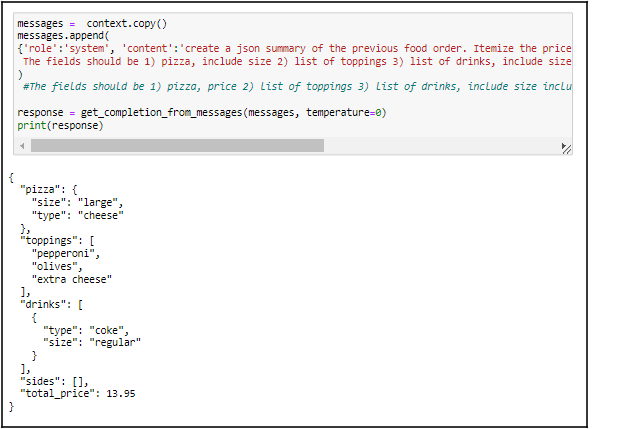

And so, here we have the summary of our order. 
And so, we could submit this to the order system if we wanted to. 
So there we have it, you've built your very own order chatbot. Feel 
free to kind of customise it yourself and play around with the 
system message to change the behaviour of the chatbot and kind of 
get it to act as different personas with different 
knowledge. 



## Try experimenting on your own!

You can modify the menu or instructions to create your own orderbot!